## Unsupervised Learning: K-Means clustering

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
df = pd.read_csv('mall_customers.csv')

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.rename(index=str, columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},
         inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [7]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

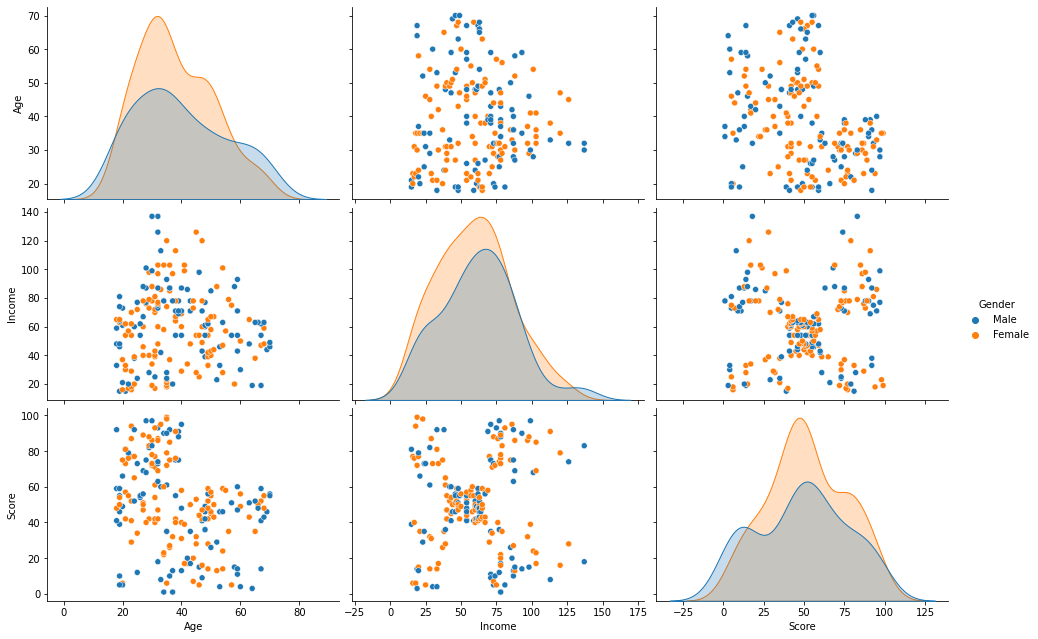

In [8]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', height=3, aspect=1.5) #axis=1 the whole column
plt.show()

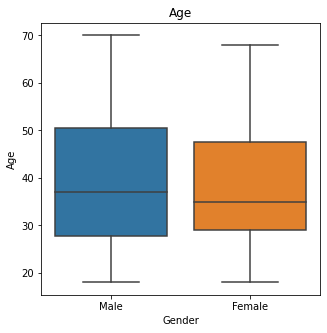

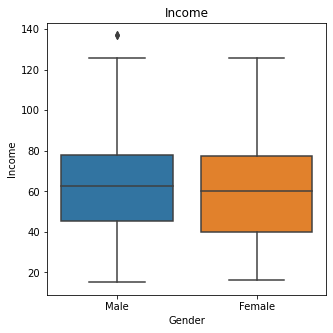

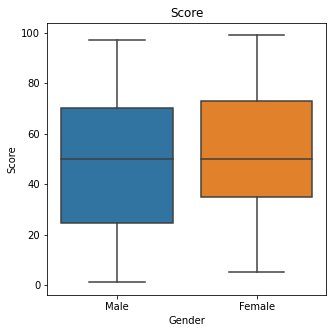

In [10]:
for i in['Age','Income','Score']:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df, x='Gender',y=i, ax=ax)
    ax.set_title(f"{i}")
    plt.show()

In [11]:
X=df.drop(['CustomerID','Gender'], axis=1)
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


k-Means clustering

In [12]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, random_state=0) #kmeans++ is the optimized
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[308812.77999999997,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.505954934364,
 44344.94980177717,
 40953.73845841785,
 37602.692961061926]

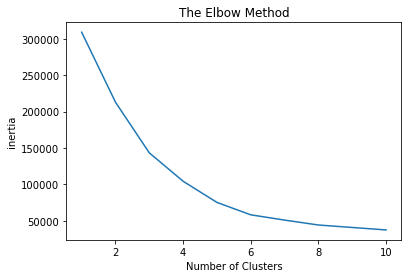

In [14]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [16]:
kmeanmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeanmodel.fit_predict(X)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


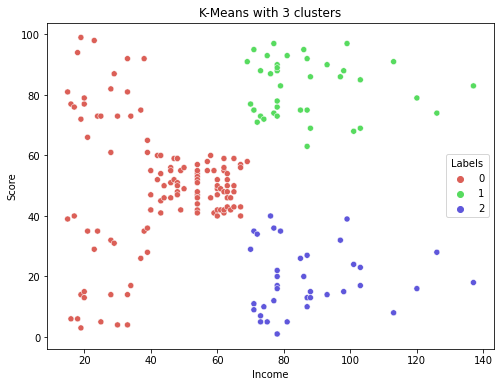

In [19]:
km3 = KMeans(n_clusters=3).fit(X)
X['Labels']=km3.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls',3))
plt.title('K-Means with 3 clusters')
plt.show()

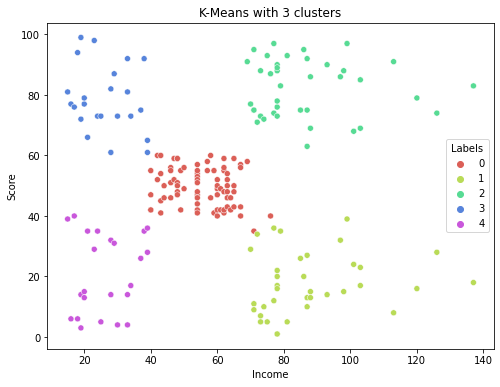

In [20]:
km5 = KMeans(n_clusters=5).fit(X)
X['Labels']=km5.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls',5))
plt.title('K-Means with 3 clusters')
plt.show()

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


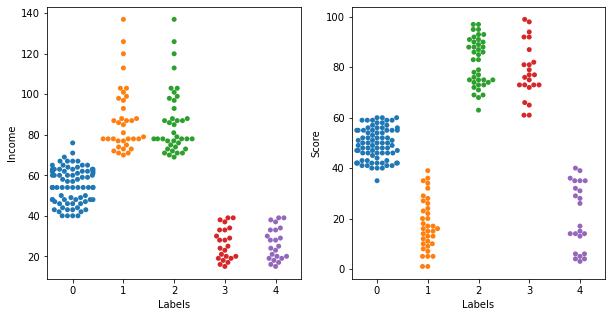

In [21]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels',y='Score', data=X, ax=ax)
plt.show()

### Remembr IRIS dataset from last week? 
### Let's test it out with our IRIS dataset!

In [22]:
iris=datasets.load_iris()

In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'petal length': iris.data[:,2]
})
data.head()

,sepal length,petal length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [26]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, random_state=0) #kmeans++ is the optimized
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[566.4937333333332,
 112.99207175925926,
 53.80997864410693,
 34.31702077922078,
 25.63406450956451,
 21.96562109459169,
 18.35522570720135,
 15.196317099567102,
 13.385935559006214,
 11.765569547602155]

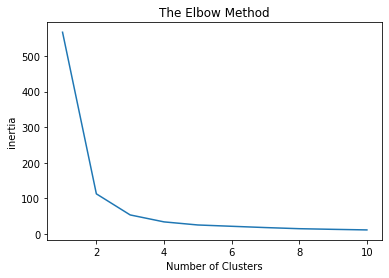

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

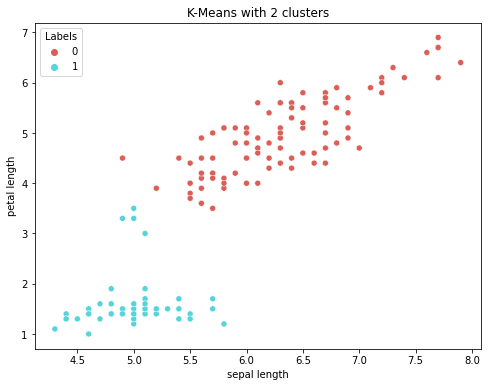

In [32]:
km2 = KMeans(n_clusters=2).fit(data)
data['Labels']=km2.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['sepal length'], y=data['petal length'], hue=data['Labels'], palette=sns.color_palette('hls',2))
plt.title('K-Means with 2 clusters')
plt.show()

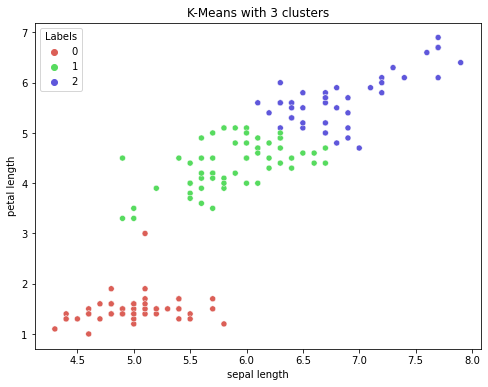

In [34]:
km3 = KMeans(n_clusters=3).fit(data)
data['Labels']=km3.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['sepal length'], y=data['petal length'], hue=data['Labels'], palette=sns.color_palette('hls',3))
plt.title('K-Means with 3 clusters')
plt.show()

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/s

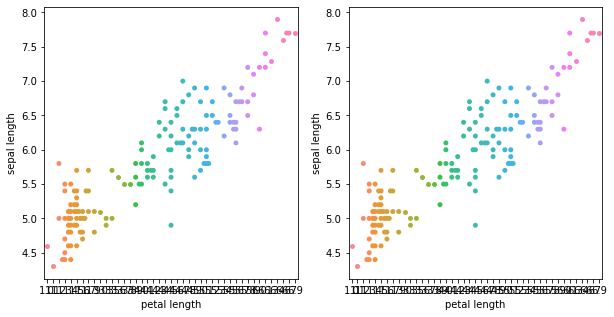

In [37]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
sns.swarmplot(x='petal length', y='sepal length', data=data, ax=ax)
ax = fig.add_subplot(122)
sns.swarmplot(x='petal length',y='sepal length', data=data, ax=ax)
plt.show()